In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def bad_line(x):
    print(x)
    return None

dtypes = {
    'Tweet':'object',
    'Date':'object',
    'time':'object',
    'Day of week':'object',
    'Cashtags':'object',
    'Hashtags':'object',
    'Language':'object',
    'Location':'bool',
    'Mentioned_users':'bool',
    'Followers':'float64',
    'Following':'float64',
    'User_created_date':'object',
    'Listed_count':'float64',
    'Favourite_count':'float64',
    'Tweet_count':'float64',
    'Verified':'bool',
    'Average_favourite_count':'float64',
    'account_age':'float64',
    'Likes':'float64',
    'Comments':'float64',
    'Retweets':'float64',
    'Views':'float64',
    'clean_tweet':'object',
    'subjectivity':'float64',
    'polarity':'float64',
    'sentiment':'object',
    'topics':'int64'
}

# df_data = pd.read_csv('/content/drive/Othercomputers/My Laptop (1)/year4/fyp_repo/social_lifter/data_science/data_set/final_data/data_sentiment_final_lemmatized_single_topic_detected.csv', 
#                       on_bad_lines=bad_line, 
#                       engine='python',
#                       dtype=dtypes)
df_data = pd.read_csv('/content/drive/Othercomputers/My Laptop (1)/year4/fyp_repo/social_lifter/data_science/data_set/final_data/data_sentiment_final_lemmatized_single_topic_detected_final_30_04.csv', 
                      on_bad_lines=bad_line, 
                      engine='python',
                      dtype=dtypes)



In [4]:
data_back = df_data.copy()

In [21]:
df_data = data_back.copy()

In [22]:
# Convert "Cashtags" column to boolean
df_data['Cashtags'] = np.where(df_data['Cashtags'].notnull(), 1, 0)

# Convert "Hashtags" column to boolean
df_data['Hashtags'] = np.where(df_data['Hashtags'].notnull(), 1, 0)
df_data["Location"] = df_data["Location"].astype(int)
df_data["Mentioned_users"] = df_data["Mentioned_users"].astype(int)
df_data["Verified"] = df_data["Verified"].astype(int)
df_data["Day of week"] = df_data["Day of week"].astype(str)
# Define the mapping from day of week string to integer
day_of_week_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# Apply the mapping to the 'Day of week' column
df_data['Day of week'] = df_data['Day of week'].map(day_of_week_map)

df_data['time'] = pd.to_datetime(df_data['time']).dt.hour
# Define the mapping from sentiment string to integer
sentiment_map = {'positive': 0, 'negative': 1, 'neutral': 2}

# Apply the mapping to the 'Day of week' column
df_data['sentiment'] = df_data['sentiment'].map(sentiment_map)

In [23]:
# Drop the columns we won't use for prediction
df_data.drop(['Tweet', 'Date', 'Listed_count', 'Favourite_count', 'Tweet_count', 'User_created_date', 'Views','Language','clean_tweet'], axis=1, inplace=True)
df_data['Followers_to_Following'] = df_data['Followers'] / df_data['Following']

# Replace infinity and large values with NaN
df_data['Followers_to_Following'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_data['Followers_to_Following'].where(df_data['Followers_to_Following'] < np.finfo(np.float64).max, np.nan, inplace=True)

# Round the values in the "Followers_to_Following" column to 2 decimal places
df_data['Followers_to_Following'] = df_data['Followers_to_Following'].round(2)
# Remove rows with null values in the "Followers_to_Following" column
df_data = df_data.dropna(subset=['Followers_to_Following'])
df_data.shape

(1134169, 19)

#Removing outliers - Followers/Following

#Followers

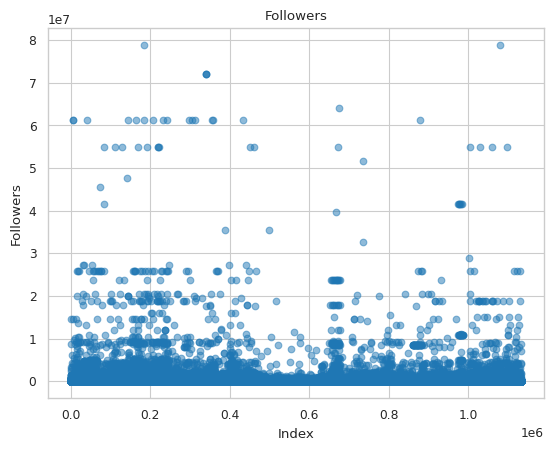

In [24]:
# Create a scatter plot of the Followers column with 
fig, ax = plt.subplots()
ax.scatter(np.arange(len(df_data)), df_data['Followers'], alpha=0.5)
# ax.scatter(outliers.index, outliers.values, color='r', alpha=0.5)
ax.set_xlabel('Index')
ax.set_ylabel('Followers')
ax.set_title('Followers')
plt.show()

Upper Bound:
 3932.5

Lower Bound:
 -2239.5


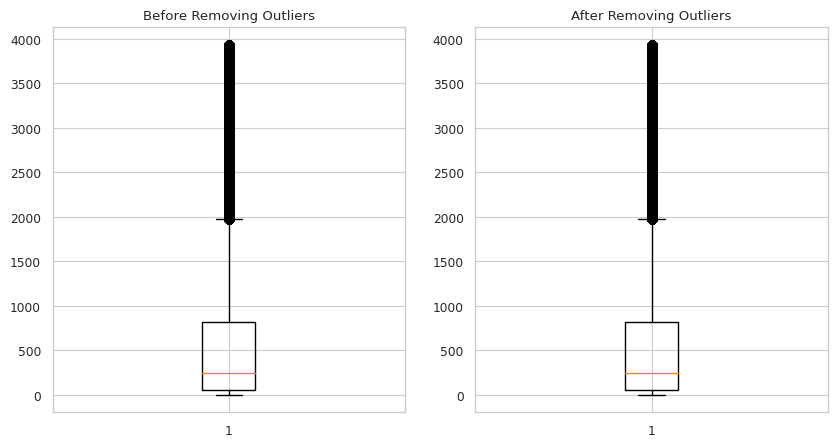

In [25]:
# Calculate IQR for 'Followers' column
Q1 = df_data['Followers'].quantile(0.25)
Q3 = df_data['Followers'].quantile(0.75)
IQR = Q3 - Q1

# Determine upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers in 'Followers' column
df_data = df_data[~((df_data['Followers'] < lower_bound) | (df_data['Followers'] > upper_bound))]

# Print upper and lower bounds
print("Upper Bound:\n", upper_bound)
print("\nLower Bound:\n", lower_bound)

# Visualize data before and after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df_data['Followers'])
axs[0].set_title('Before Removing Outliers')
axs[1].boxplot(df_data['Followers'])
axs[1].set_title('After Removing Outliers')
plt.show()

In [26]:
df_data.shape

(971547, 19)

#Following

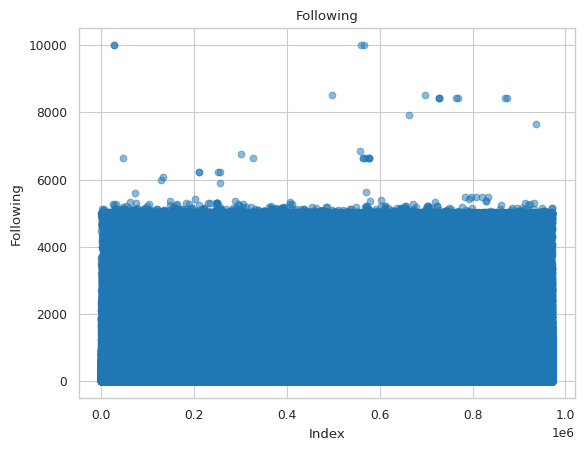

In [27]:
# Create a scatter plot of the Following column with 
fig, ax = plt.subplots()
ax.scatter(np.arange(len(df_data)), df_data['Following'], alpha=0.5)
# ax.scatter(outliers.index, outliers.values, color='r', alpha=0.5)
ax.set_xlabel('Index')
ax.set_ylabel('Following')
ax.set_title('Following')
plt.show()

Upper Bound:
 2049.0

Lower Bound:
 -1055.0


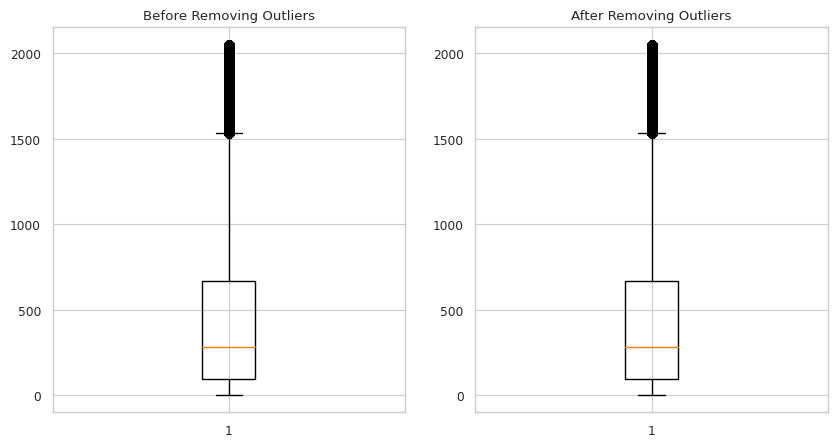

In [28]:
# Calculate IQR for 'Following' column
Q1 = df_data['Following'].quantile(0.25)
Q3 = df_data['Following'].quantile(0.75)
IQR = Q3 - Q1

# Determine upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers in 'Following' column
df_data = df_data[~((df_data['Following'] < lower_bound) | (df_data['Following'] > upper_bound))]

# Print upper and lower bounds
print("Upper Bound:\n", upper_bound)
print("\nLower Bound:\n", lower_bound)

# Visualize data before and after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df_data['Following'])
axs[0].set_title('Before Removing Outliers')
axs[1].boxplot(df_data['Following'])
axs[1].set_title('After Removing Outliers')
plt.show()

In [29]:
df_data.shape

(880076, 19)

In [30]:
df_data_cleaned = df_data.copy()

In [31]:
df_data.dropna(subset=['Average_favourite_count'], inplace=True)
df_data = df_data[df_data['Likes'] != 0.0]
df_data.shape

(402054, 19)

#Removing outliers - Likes

Upper Bound:
 56.0

Lower Bound:
 -32.0


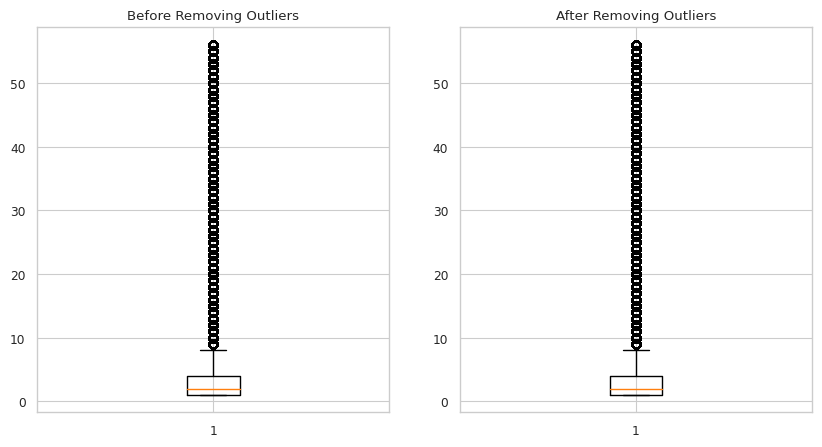

In [32]:
# Calculate IQR for 'Likes' column
Q1 = df_data['Likes'].quantile(0.25)
Q3 = df_data['Likes'].quantile(0.95)
IQR = Q3 - Q1

# Determine upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers in 'Likes' column
df_data = df_data[~((df_data['Likes'] < lower_bound) | (df_data['Likes'] > upper_bound))]

# Print upper and lower bounds
print("Upper Bound:\n", upper_bound)
print("\nLower Bound:\n", lower_bound)

# Visualize data before and after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df_data['Likes'])
axs[0].set_title('Before Removing Outliers')
axs[1].boxplot(df_data['Likes'])
axs[1].set_title('After Removing Outliers')
plt.show()

In [33]:
df_data.shape
# (394593, 19)

(393955, 19)

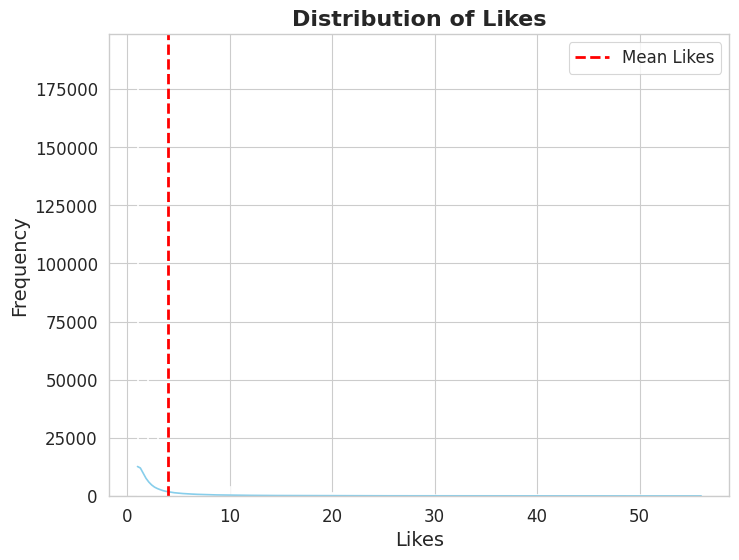

In [34]:
# Set style and context of the plot
sns.set_style('whitegrid')
sns.set_context('paper')

# Create the histogram plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df_data['Likes'], kde=True, color='skyblue', edgecolor='white', linewidth=1.2, ax=ax)

# Set the plot title, x-axis label and y-axis label
plt.title('Distribution of Likes', fontsize=16, fontweight='bold')
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set the tick label size of both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for the mean value
mean_likes = df_data['Likes'].mean()
plt.axvline(mean_likes, color='red', linestyle='--', linewidth=2, label='Mean Likes')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


In [35]:
max_followers = df_data['Likes'].max()
print("The maximum value in the 'Followers' column is:", max_followers)


The maximum value in the 'Followers' column is: 56.0


In [36]:
X = df_data.drop(["Likes", "Comments", "Retweets"], axis=1)
y_likes = df_data["Likes"]
y_comments = df_data["Comments"]
y_retweets = df_data["Retweets"]

In [37]:
# Count the number of NaN values in each column
null_counts = X.isna().sum()

# Print the null counts for each column
print(null_counts)

time                       0
Day of week                0
Cashtags                   0
Hashtags                   0
Location                   0
Mentioned_users            0
Followers                  0
Following                  0
Verified                   0
Average_favourite_count    0
account_age                0
subjectivity               0
polarity                   0
sentiment                  0
topics                     0
Followers_to_Following     0
dtype: int64


In [38]:
# Split the data into train and test sets for each target variable separately
X_train_likes, X_test_likes, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)


#Linear Regression Likes

In [39]:
# Train separate linear regression models for each target variable
linear_reg_likes = LinearRegression()
linear_reg_likes.fit(X_train_likes, y_train_likes)
y_pred_likes_lr = linear_reg_likes.predict(X_test_likes)

In [40]:
from sklearn.metrics import mean_absolute_percentage_error
mse_lr = metrics.mean_squared_error(y_test_likes, y_pred_likes_lr)
mae_lr = metrics.mean_absolute_error(y_test_likes, y_pred_likes_lr)
r2_lr = np.sqrt(metrics.mean_squared_error(y_test_likes, y_pred_likes_lr))
mape = mean_absolute_percentage_error(y_test_likes, y_pred_likes_lr)


# Mean Absolute Error (MAE) - Likes -LR: 356254.8215719718
# Mean Squared Error (MSE) - Likes -LR: 22.857607123775978
# Root Mean Squared Error (RMSE) - Likes -LR: 596.8708583705288
# Mean absolute percentage error(MAPE) - Likes -LR: 28590730499220212.00%
print('Mean Absolute Error (MAE) - Likes -LR:', mae_lr)
print('Mean Squared Error (MSE) - Likes -LR:', mse_lr)
print('Root Mean Squared Error (RMSE) - Likes -LR:', r2_lr)
print(f"Mean absolute percentage error(MAPE) - Likes -LR: {mape:.2f}%")

Mean Absolute Error (MAE) - Likes -LR: 3.6486107146877487
Mean Squared Error (MSE) - Likes -LR: 44.136988375145314
Root Mean Squared Error (RMSE) - Likes -LR: 6.643567443410604
Mean absolute percentage error(MAPE) - Likes -LR: 1.65%


In [41]:
import pickle

# Save the model to a file
with open('lr_reg_likes.pkl', 'wb') as f:
    pickle.dump(linear_reg_likes, f)

#DecisionTreeRegressor Likes

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt_reg_likes = DecisionTreeRegressor(random_state=42,max_depth=8, min_samples_split=8, min_samples_leaf=3, max_features= 'sqrt')
dt_reg_likes.fit(X_train_likes, y_train_likes)
y_pred_likes_dt = dt_reg_likes.predict(X_test_likes)

In [44]:
mae_dt_likes = metrics.mean_absolute_error(y_test_likes, y_pred_likes_dt)
mse_dt_likes = metrics.mean_squared_error(y_test_likes, y_pred_likes_dt)
r2_dt_likes = np.sqrt(metrics.mean_squared_error(y_test_likes, y_pred_likes_dt))
mape_dt_likes = mean_absolute_percentage_error(y_test_likes, y_pred_likes_dt)


# Mean Absolute Error (MAE) - Likes -dt: 22.320914147574396
# Mean Squared Error (MSE) - Likes -dt: 364359.32831504033
# Root Mean Squared Error (RMSE) - Likes -dt: 603.6218421454282
# Mean absolute percentage error(MAPE) - Likes -dt: 25872854608848556.00%
print('Mean Absolute Error (MAE) - Likes -dt:', mae_dt_likes)
print('Mean Squared Error (MSE) - Likes -dt:', mse_dt_likes)
print('Root Mean Squared Error (RMSE) - Likes -dt:', r2_dt_likes)
print(f"Mean absolute percentage error(MAPE) - Likes -dt: {mape_dt_likes:.2f}%")

Mean Absolute Error (MAE) - Likes -dt: 3.556672792708722
Mean Squared Error (MSE) - Likes -dt: 43.064786197971735
Root Mean Squared Error (RMSE) - Likes -dt: 6.562376566303684
Mean absolute percentage error(MAPE) - Likes -dt: 1.58%


In [45]:
import pickle

# Save the model to a file
with open('dt_reg_likes.pkl', 'wb') as f:
    pickle.dump(dt_reg_likes, f)

#Hyperparameter tunning - descesion tree

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [6, 8, 10],
    'min_samples_split': [4, 8, 12],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object with the DecisionTreeRegressor and the parameter grid
dt_reg_likes = DecisionTreeRegressor(random_state=42)
dt_reg_likes_cv = GridSearchCV(dt_reg_likes, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
dt_reg_likes_cv.fit(X_train_likes, y_train_likes)

# Get the best hyperparameters and the best score
best_params = dt_reg_likes_cv.best_params_
best_score = dt_reg_likes_cv.best_score_

# Print the results
print('Best Hyperparameters:', best_params)
print('Best Score:', best_score)

Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4}
Best Score: 0.06744904060419574


In [47]:
dt_reg_likes_best = DecisionTreeRegressor(random_state=42,max_depth=8, min_samples_split=4, min_samples_leaf=3, max_features= 'sqrt')
dt_reg_likes_best.fit(X_train_likes, y_train_likes)
y_pred_likes_dt_best = dt_reg_likes_best.predict(X_test_likes)

In [48]:
mae_dt_likes_best = metrics.mean_absolute_error(y_test_likes, y_pred_likes_dt_best)
mse_dt_likes_best = metrics.mean_squared_error(y_test_likes, y_pred_likes_dt_best)
r2_dt_likes_best = np.sqrt(metrics.mean_squared_error(y_test_likes, y_pred_likes_dt_best))
mape_dt_likes_best = mean_absolute_percentage_error(y_test_likes, y_pred_likes_dt_best)


# Mean Absolute Error (MAE) - Likes -dt: 22.320914147574396
# Mean Squared Error (MSE) - Likes -dt: 364359.32831504033
# Root Mean Squared Error (RMSE) - Likes -dt: 603.6218421454282
# Mean absolute percentage error(MAPE) - Likes -dt: 25872854608848556.00%
print('Mean Absolute Error (MAE) - Likes -dt:', mae_dt_likes_best)
print('Mean Squared Error (MSE) - Likes -dt:', mse_dt_likes_best)
print('Root Mean Squared Error (RMSE) - Likes -dt:', r2_dt_likes_best)
print(f"Mean absolute percentage error(MAPE) - Likes -dt: {mape_dt_likes_best:.2f}%")

Mean Absolute Error (MAE) - Likes -dt: 3.55620552080037
Mean Squared Error (MSE) - Likes -dt: 42.834275223265365
Root Mean Squared Error (RMSE) - Likes -dt: 6.544789929651323
Mean absolute percentage error(MAPE) - Likes -dt: 1.58%


In [49]:
with open('dt_reg_likes_best_30_04_02.pkl', 'wb') as f:
    pickle.dump(dt_reg_likes_best, f)

#RandomForestRegressor Likes

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_reg_likes = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_likes.fit(X_train_likes, y_train_likes)
y_pred_likes_rf = rf_reg_likes.predict(X_test_likes)

In [52]:
mae_rf_likes = metrics.mean_absolute_error(y_test_likes, y_pred_likes_rf)
mse_rf_likes = metrics.mean_squared_error(y_test_likes, y_pred_likes_rf)
r2_rf_likes = np.sqrt(metrics.mean_squared_error(y_test_likes, y_pred_likes_rf))
mape_rf_likes = mean_absolute_percentage_error(y_test_likes, y_pred_likes_rf)



# Mean Absolute Error (MAE) - Likes -rf: 20.05182340666568
# Mean Squared Error (MSE) - Likes -rf: 332818.47495836805
# Root Mean Squared Error (RMSE) - Likes -rf: 576.9042164505023
# Mean absolute percentage error(MAPE) - Likes -rf: 10237827442376686.00%
print('Mean Absolute Error (MAE) - Likes -rf:', mae_rf_likes)
print('Mean Squared Error (MSE) - Likes -rf:', mse_rf_likes)
print('Root Mean Squared Error (RMSE) - Likes -rf:', r2_rf_likes)
print(f"Mean absolute percentage error(MAPE) - Likes -rf: {mape_rf_likes:.2f}%")


Mean Absolute Error (MAE) - Likes -rf: 3.6321707410363455
Mean Squared Error (MSE) - Likes -rf: 41.22466320154318
Root Mean Squared Error (RMSE) - Likes -rf: 6.420643519269948
Mean absolute percentage error(MAPE) - Likes -rf: 1.70%


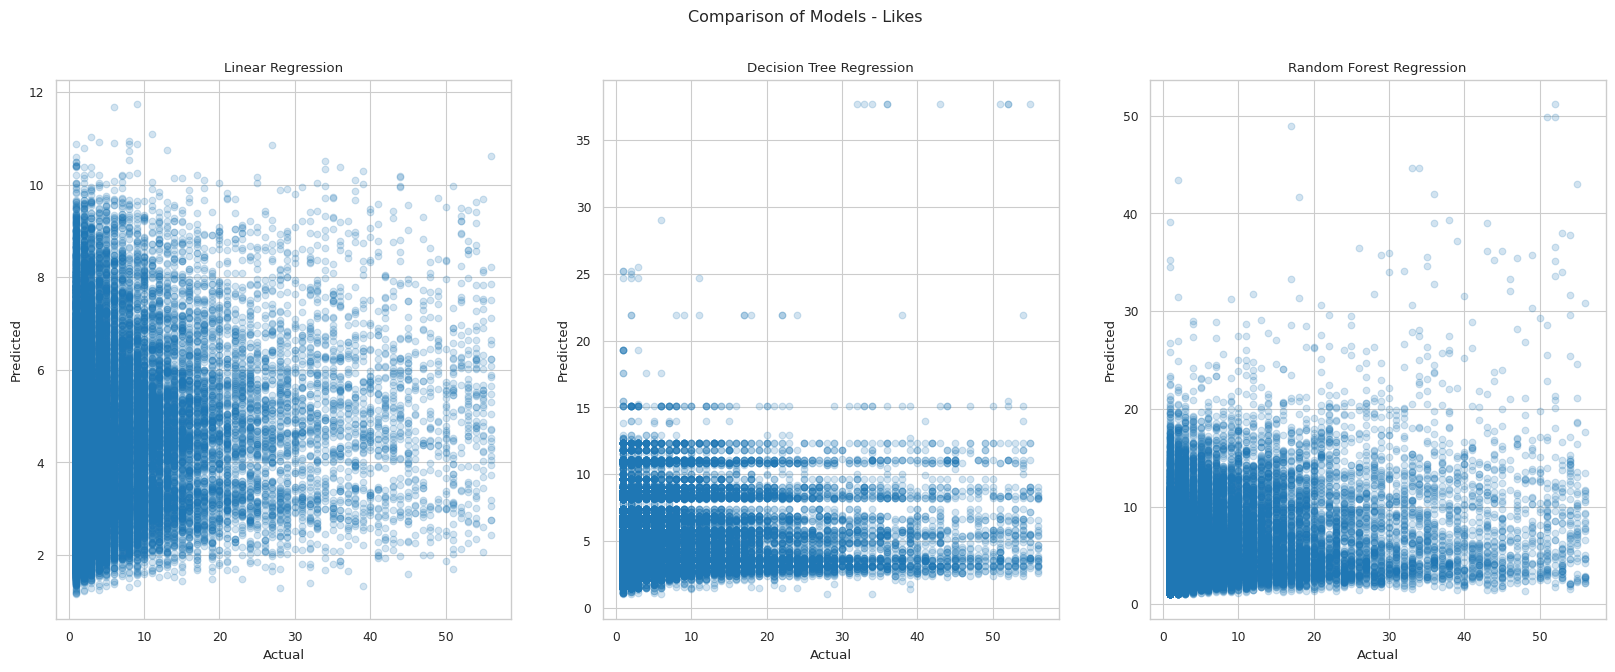

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Comparison of Models - Likes')

axs[0].scatter(y_test_likes, y_pred_likes_lr, alpha=0.2)
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

axs[1].scatter(y_test_likes, y_pred_likes_dt_best, alpha=0.2)
axs[1].set_title('Decision Tree Regression')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

axs[2].scatter(y_test_likes, y_pred_likes_rf, alpha=0.2)
axs[2].set_title('Random Forest Regression')
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')

plt.show()


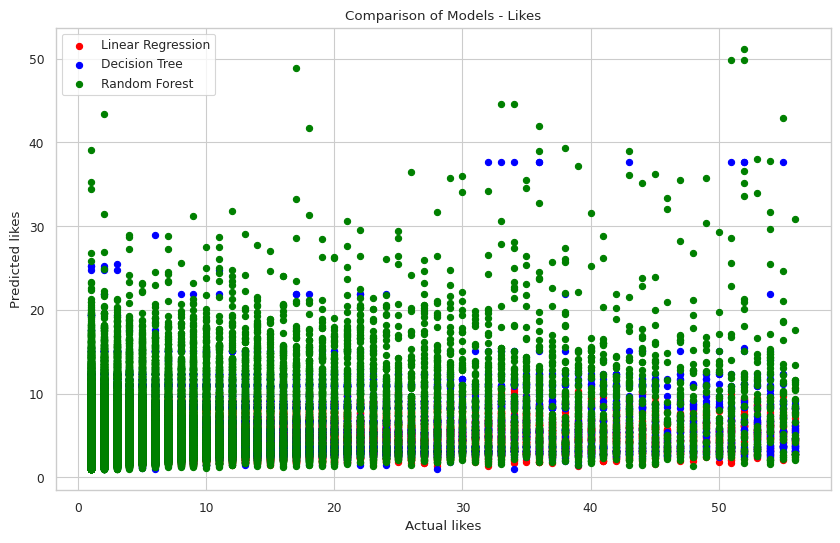

In [54]:
# Plot the results for each model
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y_test_likes, y_pred_likes_lr, s=20, color='red', label='Linear Regression')
ax.scatter(y_test_likes, y_pred_likes_dt_best, s=20, color='blue', label='Decision Tree')
ax.scatter(y_test_likes, y_pred_likes_rf, s=20, color='green', label='Random Forest')

# Add labels and legend
ax.set_xlabel('Actual likes')
ax.set_ylabel('Predicted likes')
ax.set_title('Comparison of Models - Likes')
ax.legend()
plt.show()

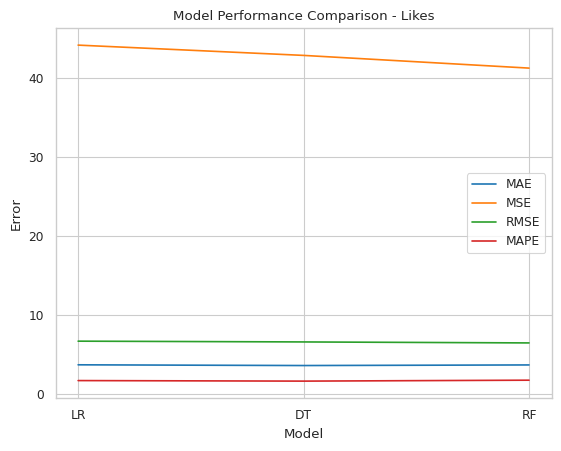

In [55]:
import matplotlib.pyplot as plt

plt.plot(['LR', 'DT', 'RF'], [mae_lr, mae_dt_likes_best, mae_rf_likes], label='MAE')
plt.plot(['LR', 'DT', 'RF'], [mse_lr, mse_dt_likes_best, mse_rf_likes], label='MSE')
plt.plot(['LR', 'DT', 'RF'], [r2_lr, r2_dt_likes_best, r2_rf_likes], label='RMSE')
plt.plot(['LR', 'DT', 'RF'], [mape, mape_dt_likes_best, mape_rf_likes], label='MAPE')

plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Performance Comparison - Likes')

plt.legend()
plt.show()


In [84]:
# Save the model to a file
with open('rf_reg_likes_01_05_01.pkl', 'wb') as f:
    pickle.dump(rf_reg_likes, f)

#Comments

In [85]:
df_comment = df_data_cleaned.copy()

In [86]:
df_comment.dropna(subset=['Average_favourite_count'], inplace=True)
df_comment = df_comment[df_comment['Comments'] != 0.0]
df_comment.shape

(253886, 19)

In [87]:
X_comments = df_comment.drop(["Likes", "Comments", "Retweets"], axis=1)
y_comments = df_comment["Comments"]

In [88]:
X_train_comments, X_test_comments, y_train_comments, y_test_comments = train_test_split(X_comments, y_comments, test_size=0.2, random_state=42)

#Linear Regression Comments

In [89]:
# Train separate linear regression models for each target variable
linear_reg_comments = LinearRegression()
linear_reg_comments.fit(X_train_comments, y_train_comments)
y_pred_comments_lr = linear_reg_comments.predict(X_test_comments)

In [90]:
mse_lr_comments = metrics.mean_squared_error(y_test_comments, y_pred_comments_lr)
mae_lr_comments = metrics.mean_absolute_error(y_test_comments, y_pred_comments_lr)
r2_lr_comments = np.sqrt(metrics.mean_squared_error(y_test_comments, y_pred_comments_lr))
mape_comments_lr = mean_absolute_percentage_error(y_test_comments, y_pred_comments_lr)


# Mean Absolute Error (MAE) - Comments -LR: 3.094766012942682
# Mean Squared Error (MSE) - Comments -LR: 553.9465400287744
# Root Mean Squared Error (RMSE) - Comments -LR: 23.536068916213992
# Mean absolute percentage error(MAPE) - Comments -LR: 1.50%
print('Mean Absolute Error (MAE) - Comments -LR:', mae_lr_comments)
print('Mean Squared Error (MSE) - Comments -LR:', mse_lr_comments)
print('Root Mean Squared Error (RMSE) - Comments -LR:', r2_lr_comments)
print(f"Mean absolute percentage error(MAPE) - Comments -LR: {mape_comments_lr:.2f}%")

Mean Absolute Error (MAE) - Comments -LR: 1.0853613458019284
Mean Squared Error (MSE) - Comments -LR: 100.13565114158826
Root Mean Squared Error (RMSE) - Comments -LR: 10.006780258484158
Mean absolute percentage error(MAPE) - Comments -LR: 0.58%


In [91]:
import pickle

# Save the model to a file
with open('lr_reg_comments_01_05_01.pkl', 'wb') as f:
    pickle.dump(linear_reg_comments, f)

#DecisionTreeRegressor Comments

In [92]:
dt_reg_comments = DecisionTreeRegressor(random_state=42,max_depth=8, min_samples_split=8, min_samples_leaf=3, max_features= 'sqrt')
dt_reg_comments.fit(X_train_comments, y_train_comments)
y_pred_comments_dt = dt_reg_comments.predict(X_test_comments)

In [93]:
mae_dt_comments = metrics.mean_absolute_error(y_test_comments, y_pred_comments_dt)
mse_dt_comments = metrics.mean_squared_error(y_test_comments, y_pred_comments_dt)
r2_dt_comments = np.sqrt(metrics.mean_squared_error(y_test_comments, y_pred_comments_dt))
mape_dt_comments = mean_absolute_percentage_error(y_test_comments, y_pred_comments_dt)


# Mean Absolute Error (MAE) - Comments -dt: 3.0544865301961797
# Mean Squared Error (MSE) - Comments -dt: 561.94033003752
# Root Mean Squared Error (RMSE) - Comments -dt: 23.705280636126627
# Mean absolute percentage error(MAPE) - Comments -dt: 1.44%
print('Mean Absolute Error (MAE) - Comments -dt:', mae_dt_comments)
print('Mean Squared Error (MSE) - Comments -dt:', mse_dt_comments)
print('Root Mean Squared Error (RMSE) - Comments -dt:', r2_dt_comments)
print(f"Mean absolute percentage error(MAPE) - Comments -dt: {mape_dt_comments:.2f}%")

Mean Absolute Error (MAE) - Comments -dt: 1.0682332422308418
Mean Squared Error (MSE) - Comments -dt: 104.62056420145514
Root Mean Squared Error (RMSE) - Comments -dt: 10.228419438087936
Mean absolute percentage error(MAPE) - Comments -dt: 0.56%


#Hyperparameter tunning - descesion tree

In [94]:

# Define the parameter grid to search over
param_grid = {
    'max_depth': [6, 8, 10],
    'min_samples_split': [4, 8, 12],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object with the DecisionTreeRegressor and the parameter grid
dt_reg_comment = DecisionTreeRegressor(random_state=42)
dt_reg_comment_cv = GridSearchCV(dt_reg_comment, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
dt_reg_comment_cv.fit(X_train_comments, y_train_comments)

# Get the best hyperparameters and the best score
best_params = dt_reg_comment_cv.best_params_
best_score = dt_reg_comment_cv.best_score_

# Print the results
print('Best Hyperparameters:', best_params)
print('Best Score:', best_score)

Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 12}
Best Score: -0.13530478742690297


In [98]:
dt_reg_comments_best = DecisionTreeRegressor(random_state=42,max_depth=8, min_samples_split=12, min_samples_leaf=42, max_features= 'sqrt')
dt_reg_comments_best.fit(X_train_comments, y_train_comments)
y_pred_comments_dt_best = dt_reg_comments.predict(X_test_comments)

In [99]:
mae_dt_comments_best = metrics.mean_absolute_error(y_test_comments, y_pred_comments_dt_best)
mse_dt_comments_best = metrics.mean_squared_error(y_test_comments, y_pred_comments_dt_best)
r2_dt_comments_best = np.sqrt(metrics.mean_squared_error(y_test_comments, y_pred_comments_dt_best))
mape_dt_comments_best = mean_absolute_percentage_error(y_test_comments, y_pred_comments_dt_best)


# Mean Absolute Error (MAE) - Comments -dt: 3.0544865301961797
# Mean Squared Error (MSE) - Comments -dt: 561.94033003752
# Root Mean Squared Error (RMSE) - Comments -dt: 23.705280636126627
# Mean absolute percentage error(MAPE) - Comments -dt: 1.44%
print('Mean Absolute Error (MAE) - Comments -dt:', mae_dt_comments_best)
print('Mean Squared Error (MSE) - Comments -dt:', mse_dt_comments_best)
print('Root Mean Squared Error (RMSE) - Comments -dt:', r2_dt_comments_best)
print(f"Mean absolute percentage error(MAPE) - Comments -dt: {mape_dt_comments_best:.2f}%")

Mean Absolute Error (MAE) - Comments -dt: 1.0682332422308418
Mean Squared Error (MSE) - Comments -dt: 104.62056420145514
Root Mean Squared Error (RMSE) - Comments -dt: 10.228419438087936
Mean absolute percentage error(MAPE) - Comments -dt: 0.56%


In [100]:

# Save the model to a file
with open('dt_reg_comments_best_01_05_01.pkl', 'wb') as f:
    pickle.dump(dt_reg_comments_best, f)

#RandomForestRegressor Comments

In [101]:
rf_reg_comments = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_comments.fit(X_train_comments, y_train_comments)
y_pred_comments_rf = rf_reg_comments.predict(X_test_comments)

In [102]:
mae_rf_comments = metrics.mean_absolute_error(y_test_comments, y_pred_comments_rf)
mse_rf_comments = metrics.mean_squared_error(y_test_comments, y_pred_comments_rf)
r2_rf_comments = np.sqrt(metrics.mean_squared_error(y_test_comments, y_pred_comments_rf))
mape_rf_comments = mean_absolute_percentage_error(y_test_comments, y_pred_comments_rf)



# Mean Absolute Error (MAE) - Comments -rf: 2.8579422567499657
# Mean Squared Error (MSE) - Comments -rf: 501.3645961568771
# Root Mean Squared Error (RMSE) - Comments -rf: 22.391172281881026
# Mean absolute percentage error(MAPE) - Comments -rf: 1.18%
print('Mean Absolute Error (MAE) - Comments -rf:', mae_rf_comments)
print('Mean Squared Error (MSE) - Comments -rf:', mse_rf_comments)
print('Root Mean Squared Error (RMSE) - Comments -rf:', r2_rf_comments)
print(f"Mean absolute percentage error(MAPE) - Comments -rf: {mape_rf_comments:.2f}%")


Mean Absolute Error (MAE) - Comments -rf: 1.1500715444863956
Mean Squared Error (MSE) - Comments -rf: 100.18321626518774
Root Mean Squared Error (RMSE) - Comments -rf: 10.009156621073913
Mean absolute percentage error(MAPE) - Comments -rf: 0.64%


In [103]:

# Save the model to a file
with open('rf_reg_comments_01_05_01.pkl', 'wb') as f:
    pickle.dump(y_pred_comments_rf, f)

#Retweets

In [104]:
df_retweets = df_data_cleaned.copy()
df_retweets.shape

(880076, 19)

In [105]:
df_retweets.dropna(subset=['Average_favourite_count'], inplace=True)
df_retweets = df_retweets[df_retweets['Retweets'] != 0.0]
df_retweets.shape

(90648, 19)

#Removing outliers - Retweets

Upper Bound:
 36.0

Lower Bound:
 -20.0


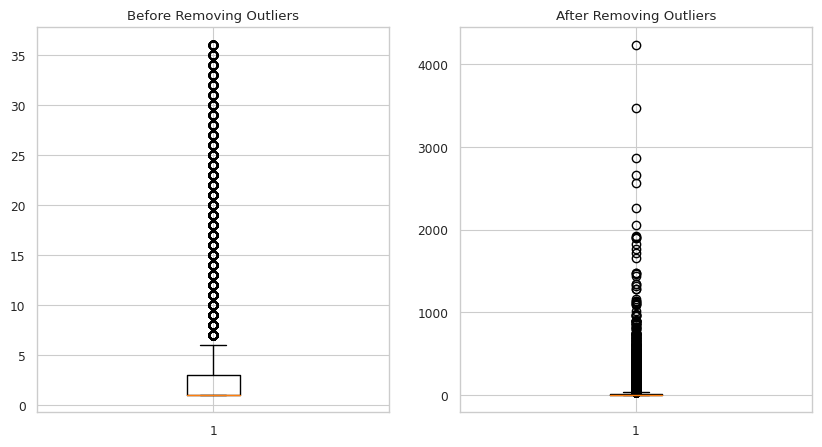

In [109]:
# Calculate IQR for 'Retweets' column
Q1 = df_retweets['Retweets'].quantile(0.25)
Q3 = df_retweets['Retweets'].quantile(0.95)
IQR = Q3 - Q1

# Determine upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers in 'Retweets' column
df_retweets = df_retweets[~((df_retweets['Retweets'] < lower_bound) | (df_retweets['Retweets'] > upper_bound))]

# Print upper and lower bounds
print("Upper Bound:\n", upper_bound)
print("\nLower Bound:\n", lower_bound)

# Visualize data before and after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df_retweets['Retweets'])
axs[0].set_title('Before Removing Outliers')
axs[1].boxplot(df_retweets['Likes'])
axs[1].set_title('After Removing Outliers')
plt.show()

In [110]:
df_data.shape
# (394593, 19)

(390337, 19)

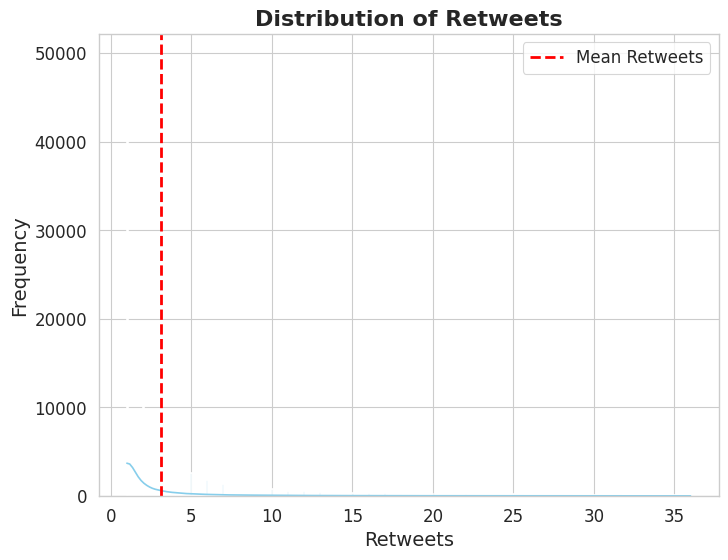

In [111]:
# Set style and context of the plot
sns.set_style('whitegrid')
sns.set_context('paper')

# Create the histogram plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df_retweets['Retweets'], kde=True, color='skyblue', edgecolor='white', linewidth=1.2, ax=ax)

# Set the plot title, x-axis label and y-axis label
plt.title('Distribution of Retweets', fontsize=16, fontweight='bold')
plt.xlabel('Retweets', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set the tick label size of both axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add vertical line for the mean value
mean_Retweets = df_retweets['Retweets'].mean()
plt.axvline(mean_Retweets, color='red', linestyle='--', linewidth=2, label='Mean Retweets')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.show()


In [ ]:
max_followers = df_data['Likes'].max()
print("The maximum value in the 'Followers' column is:", max_followers)


The maximum value in the 'Followers' column is: 56.0


(1150394, 18)

(162920, 18)

In [63]:
X_retweets = df_retweets.drop(["Likes", "Comments", "Retweets"], axis=1)
y_retweets = df_retweets["Retweets"]

In [64]:
X_train_retweets, X_test_retweets, y_train_retweets, y_test_retweets = train_test_split(X_retweets, y_retweets, test_size=0.2, random_state=42)

#Linear Regression Retweets

In [65]:
# Train separate linear regression models for each target variable
linear_reg_retweets = LinearRegression()
linear_reg_retweets.fit(X_train_retweets, y_train_retweets)
y_pred_retweets_lr = linear_reg_retweets.predict(X_test_retweets)

In [66]:
mse_lr_retweets = metrics.mean_squared_error(y_test_retweets, y_pred_retweets_lr)
mae_lr_retweets = metrics.mean_absolute_error(y_test_retweets, y_pred_retweets_lr)
r2_lr_retweets = np.sqrt(metrics.mean_squared_error(y_test_retweets, y_pred_retweets_lr))
mape_retweets_lr = mean_absolute_percentage_error(y_test_retweets, y_pred_retweets_lr)


# Mean Absolute Error (MAE) - Likes -LR: 356254.8215719718
# Mean Squared Error (MSE) - Likes -LR: 22.857607123775978
# Root Mean Squared Error (RMSE) - Likes -LR: 596.8708583705288
# Mean absolute percentage error(MAPE) - Likes -LR: 28590730499220212.00%
print('Mean Absolute Error (MAE) - retweets -LR:', mae_lr_retweets)
print('Mean Squared Error (MSE) - retweets -LR:', mse_lr_retweets)
print('Root Mean Squared Error (RMSE) - retweets -LR:', r2_lr_retweets)
print(f"Mean absolute percentage error(MAPE) - retweets -LR: {mape_retweets_lr:.2f}%")

Mean Absolute Error (MAE) - retweets -LR: 29.24379018173184
Mean Squared Error (MSE) - retweets -LR: 168617.98798983725
Root Mean Squared Error (RMSE) - retweets -LR: 410.63120679003106
Mean absolute percentage error(MAPE) - retweets -LR: 9.74%


In [92]:


# Save the model to a file
with open('linear_reg_retweets_30_04_01.pkl', 'wb') as f:
    pickle.dump(linear_reg_retweets, f)

#DecisionTreeRegressor Retweets

In [67]:
dt_reg_retweets = DecisionTreeRegressor(random_state=42,max_depth=8, min_samples_split=8, min_samples_leaf=3, max_features= 'sqrt')
dt_reg_retweets.fit(X_train_retweets, y_train_retweets)
y_pred_retweets_dt = dt_reg_retweets.predict(X_test_retweets)

In [68]:
mae_dt_retweets = metrics.mean_absolute_error(y_test_retweets, y_pred_retweets_dt)
mse_dt_retweets = metrics.mean_squared_error(y_test_retweets, y_pred_retweets_dt)
r2_dt_retweets = np.sqrt(metrics.mean_squared_error(y_test_retweets, y_pred_retweets_dt))
mape_dt_retweets = mean_absolute_percentage_error(y_test_retweets, y_pred_retweets_dt)


# Mean Absolute Error (MAE) - Likes -dt: 22.320914147574396
# Mean Squared Error (MSE) - Likes -dt: 364359.32831504033
# Root Mean Squared Error (RMSE) - Likes -dt: 603.6218421454282
# Mean absolute percentage error(MAPE) - Likes -dt: 25872854608848556.00%
print('Mean Absolute Error (MAE) - retweets -dt:', mae_dt_retweets)
print('Mean Squared Error (MSE) - retweets -dt:', mse_dt_retweets)
print('Root Mean Squared Error (RMSE) - retweets -dt:', r2_dt_retweets)
print(f"Mean absolute percentage error(MAPE) - retweets -dt: {mape_dt_retweets:.2f}%")

Mean Absolute Error (MAE) - retweets -dt: 28.307648272049345
Mean Squared Error (MSE) - retweets -dt: 173195.942681836
Root Mean Squared Error (RMSE) - retweets -dt: 416.1681663484558
Mean absolute percentage error(MAPE) - retweets -dt: 7.10%


#Hyperparameter tunning - descesion tree - retweets

In [69]:

# Define the parameter grid to search over
param_grid = {
    'max_depth': [6, 8, 10],
    'min_samples_split': [4, 8, 12],
    'min_samples_leaf': [2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a GridSearchCV object with the DecisionTreeRegressor and the parameter grid
dt_reg_retweets = DecisionTreeRegressor(random_state=42)
dt_reg_retweets_cv = GridSearchCV(dt_reg_retweets, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
dt_reg_retweets_cv.fit(X_train_retweets, y_train_retweets)

# Get the best hyperparameters and the best score
best_params = dt_reg_retweets_cv.best_params_
best_score = dt_reg_retweets_cv.best_score_

# Print the results
print('Best Hyperparameters:', best_params)
print('Best Score:', best_score)

Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 12}
Best Score: 0.06859586455605393


In [75]:
dt_reg_retweets_best = DecisionTreeRegressor(random_state=42,max_depth=6, min_samples_split=4, min_samples_leaf=4, max_features= 'sqrt')
dt_reg_retweets_best.fit(X_train_retweets, y_train_retweets)
y_pred_retweets_dt_best = dt_reg_retweets_best.predict(X_test_retweets)

In [76]:
mae_dt_retweets_best = metrics.mean_absolute_error(y_test_retweets, y_pred_retweets_dt_best)
mse_dt_retweets_best = metrics.mean_squared_error(y_test_retweets, y_pred_retweets_dt_best)
r2_dt_retweets_best = np.sqrt(metrics.mean_squared_error(y_test_retweets, y_pred_retweets_dt_best))
mape_dt_retweets_best = mean_absolute_percentage_error(y_test_retweets, y_pred_retweets_dt_best)


# Mean Absolute Error (MAE) - Likes -dt: 22.320914147574396
# Mean Squared Error (MSE) - Likes -dt: 364359.32831504033
# Root Mean Squared Error (RMSE) - Likes -dt: 603.6218421454282
# Mean absolute percentage error(MAPE) - Likes -dt: 25872854608848556.00%
print('Mean Absolute Error (MAE) - retweets -dt:', mae_dt_retweets_best)
print('Mean Squared Error (MSE) - retweets -dt:', mse_dt_retweets_best)
print('Root Mean Squared Error (RMSE) - retweets -dt:', r2_dt_retweets_best)
print(f"Mean absolute percentage error(MAPE) - retweets -dt: {mape_dt_retweets_best:.2f}%")

Mean Absolute Error (MAE) - retweets -dt: 28.40266800523349
Mean Squared Error (MSE) - retweets -dt: 167845.39223415905
Root Mean Squared Error (RMSE) - retweets -dt: 409.68938506404953
Mean absolute percentage error(MAPE) - retweets -dt: 7.75%


In [93]:
# Save the model to a file
with open('dt_reg_retweets_best_30_04_01.pkl', 'wb') as f:
    pickle.dump(dt_reg_retweets_best, f)

#RandomForestRegressor Retweets

In [79]:
rf_reg_retweets = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_retweets.fit(X_train_retweets, y_train_retweets)
y_pred_retweets_rf = rf_reg_retweets.predict(X_test_retweets)

In [80]:
mae_rf_retweets = metrics.mean_absolute_error(y_test_retweets, y_pred_retweets_rf)
mse_rf_retweets = metrics.mean_squared_error(y_test_retweets, y_pred_retweets_rf)
r2_rf_retweets = np.sqrt(metrics.mean_squared_error(y_test_retweets, y_pred_retweets_rf))
mape_rf_retweets = mean_absolute_percentage_error(y_test_retweets, y_pred_retweets_rf)



# Mean Absolute Error (MAE) - Likes -rf: 20.05182340666568
# Mean Squared Error (MSE) - Likes -rf: 332818.47495836805
# Root Mean Squared Error (RMSE) - Likes -rf: 576.9042164505023
# Mean absolute percentage error(MAPE) - Likes -rf: 10237827442376686.00%
print('Mean Absolute Error (MAE) - retweets -rf:', mae_rf_retweets)
print('Mean Squared Error (MSE) - retweets -rf:', mse_rf_retweets)
print('Root Mean Squared Error (RMSE) - retweets -rf:', r2_rf_retweets)
print(f"Mean absolute percentage error(MAPE) - retweets -rf: {mape_rf_retweets:.2f}%")


Mean Absolute Error (MAE) - retweets -rf: 26.566430507954912
Mean Squared Error (MSE) - retweets -rf: 164629.98679641835
Root Mean Squared Error (RMSE) - retweets -rf: 405.7462098361713
Mean absolute percentage error(MAPE) - retweets -rf: 6.05%


In [94]:
# Save the model to a file
with open('rf_reg_retweets_30_04_01.pkl', 'wb') as f:
    pickle.dump(rf_reg_retweets, f)

#RNN

In [ ]:
X_train.shape

(920212, 15)

In [96]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

# create the GRU RNN model
model = Sequential()
model.add(GRU(50, input_shape=(X_train_likes.shape[1], 1)))
model.add(Dense(1))

# compile the model
model.compile(loss='mse', optimizer=Adam(lr=0.001))

# train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_likes, y_train_likes, validation_split=0.2, epochs=10, batch_size=256, callbacks=[early_stopping])




Epoch 1/10
1414/1414 [==============================] - 47s 31ms/step - loss: 420800.6875 - val_loss: 634657.7500
Epoch 2/10
1414/1414 [==============================] - 52s 37ms/step - loss: 420678.6250 - val_loss: 634639.7500
Epoch 3/10
1414/1414 [==============================] - 43s 30ms/step - loss: 420676.8125 - val_loss: 634634.6250
Epoch 4/10
1414/1414 [==============================] - 44s 31ms/step - loss: 420672.6562 - val_loss: 634637.0625
Epoch 5/10
1414/1414 [==============================] - 44s 31ms/step - loss: 420671.8438 - val_loss: 634635.5000
Epoch 6/10
1414/1414 [==============================] - 46s 32ms/step - loss: 420669.6562 - val_loss: 634640.6250


In [ ]:
# evaluate the model on the test set
y_pred_likes = model.predict(X_test_likes)
mape = mean_absolute_percentage_error(y_test_likes, y_pred_likes)
print('MAPE: {:.2f}%'.format(mape*100))

3533/3533 [==============================] - 14s 4ms/step
MAPE: 1384.34%


#XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model_likes = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
# Fit the model to the training data
xgb_model_likes.fit(X_train_likes, y_train_likes)
y_pred_likes_xg = xgb_model_likes.predict(X_test_likes)

In [ ]:
print('Mean Absolute Error (MAE) - likes - xg :', metrics.mean_absolute_error(y_test_likes, y_pred_likes_xg))
print('Mean Squared Error (MSE) - likes - xg :', metrics.mean_squared_error(y_test_retweets, y_pred_likes_xg))
print('Root Mean Squared Error (RMSE) - likes - xg :', np.sqrt(metrics.mean_squared_error(y_test_retweets, y_pred_likes_xg)))

mae_xg_likes = metrics.mean_absolute_error(y_test_likes, y_pred_likes_xg)
mse_xg_likes = metrics.mean_squared_error(y_test_likes, y_pred_likes_xg)
r2_xg_likes = np.sqrt(metrics.mean_squared_error(y_test_likes, y_pred_likes_xg))
mape_xg_likes = mean_absolute_percentage_error(y_test_likes, y_pred_likes_xg)



# Mean Absolute Error (MAE) - Likes -rf: 20.05182340666568
# Mean Squared Error (MSE) - Likes -rf: 332818.47495836805
# Root Mean Squared Error (RMSE) - Likes -rf: 576.9042164505023
# Mean absolute percentage error(MAPE) - Likes -rf: 10237827442376686.00%
print('Mean Absolute Error (MAE) - Likes -rf:', mae_xg_likes)
print('Mean Squared Error (MSE) - Likes -rf:', mae_xg_likes)
print('Root Mean Squared Error (RMSE) - Likes -rf:', mae_xg_likes)
print(f"Mean absolute percentage error(MAPE) - Likes -rf: {mae_xg_likes:.2f}%")

Mean Absolute Error (MAE) - likes - xg : 36.50740184487171
Mean Squared Error (MSE) - likes - xg : 96510.28439069098
Root Mean Squared Error (RMSE) - likes - xg : 310.6610442116793
Mean Absolute Error (MAE) - Likes -rf: 36.50740184487171
Mean Squared Error (MSE) - Likes -rf: 36.50740184487171
Root Mean Squared Error (RMSE) - Likes -rf: 36.50740184487171
Mean absolute percentage error(MAPE) - Likes -rf: 36.51%


In [ ]:
xgb_model_comments = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
# Fit the model to the training data
xgb_model_comments.fit(X_train, y_train_comments)
y_pred_comments_xg = xgb_model_comments.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE) - comments - xg :', metrics.mean_absolute_error(y_test_comments, y_pred_comments_xg))
print('Mean Squared Error (MSE) - comments - xg :', metrics.mean_squared_error(y_test_comments, y_pred_comments_xg))
print('Root Mean Squared Error (RMSE) - comments - xg :', np.sqrt(metrics.mean_squared_error(y_test_comments, y_pred_comments_xg)))

Mean Absolute Error (MAE) - comments - xg : 1.6754527255308496
Mean Squared Error (MSE) - comments - xg : 282.45990436812184
Root Mean Squared Error (RMSE) - comments - xg : 16.80654349853419


In [ ]:
xgb_model_retweets = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)
# Fit the model to the training data
xgb_model_retweets.fit(X_train, y_train_retweets)
y_pred_retweets_xg = xgb_model_retweets.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE) - retweets - xg :', metrics.mean_absolute_error(y_test_retweets, y_pred_retweets_xg))
print('Mean Squared Error (MSE) - retweets - xg :', metrics.mean_squared_error(y_test_retweets, y_pred_retweets_xg))
print('Root Mean Squared Error (RMSE) - retweets - xg :', np.sqrt(metrics.mean_squared_error(y_test_retweets, y_pred_retweets_xg)))

Mean Absolute Error (MAE) - retweets - xg : 5.770601299611658
Mean Squared Error (MSE) - retweets - xg : 2512.758071409142
Root Mean Squared Error (RMSE) - retweets - xg : 50.12741835970751


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define the input shape
input_shape = (X_train_likes.shape[1],)


In [ ]:
# Define the model architecture
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

In [ ]:
# Compile the model
nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanSquaredError(),
    metrics=['mse']
)


In [ ]:

# Fit the model on the training data
nn_likes_model = nn_model.fit(
    X_train_likes, y_train_likes,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
11306/11306 [==============================] - 36s 3ms/step - loss: 1325466240.0000 - mse: 1325466240.0000 - val_loss: 635526.5000 - val_mse: 635526.5000
Epoch 2/100
11306/11306 [==============================] - 33s 3ms/step - loss: 891636.1875 - mse: 891636.1875 - val_loss: 635334.6875 - val_mse: 635334.6875
Epoch 3/100
11306/11306 [==============================] - 32s 3ms/step - loss: 426167.1562 - mse: 426167.1562 - val_loss: 635205.8125 - val_mse: 635205.8125
Epoch 4/100
11306/11306 [==============================] - 31s 3ms/step - loss: 423258.1250 - mse: 423258.1250 - val_loss: 635088.6875 - val_mse: 635088.6875
Epoch 5/100
11306/11306 [==============================] - 30s 3ms/step - loss: 421061.6250 - mse: 421061.6250 - val_loss: 634996.6250 - val_mse: 634996.6250
Epoch 6/100
11306/11306 [==============================] - 29s 3ms/step - loss: 420942.1250 - mse: 420942.1250 - val_loss: 634911.1875 - val_mse: 634911.1875
Epoch 7/100
11306/11306 [===================

In [ ]:
y_pred_likes_nn = nn_model.predict(X_test_likes)

878/878 [==============================] - 1s 1ms/step


In [ ]:
print('Mean Absolute Error (MAE) - likes - nn :', metrics.mean_absolute_error(y_test_likes, y_pred_likes_nn))
print('Mean Squared Error (MSE) - likes - nn :', metrics.mean_squared_error(y_test_likes, y_pred_likes_nn))
print('Root Mean Squared Error (RMSE) - likes - nn :', np.sqrt(metrics.mean_squared_error(y_test_likes, y_pred_likes_nn)))

Mean Absolute Error (MAE) - likes - nn : 21.53940425492583
Mean Squared Error (MSE) - likes - nn : 20380.56872076232
Root Mean Squared Error (RMSE) - likes - nn : 142.76052928159913


In [ ]:

# Fit the model on the training data
nn_comments_model = nn_model.fit(
    X_train, y_train_comments,
    batch_size=32,
    epochs=100,
    validation_split=0.2
)

In [ ]:
y_pred_comments_nn = nn_comments_model.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE) - comments - nn :', metrics.mean_absolute_error(y_test_comments, y_pred_comments_nn))
print('Mean Squared Error (MSE) - comments - nn :', metrics.mean_squared_error(y_test_comments, y_pred_comments_nn))
print('Root Mean Squared Error (RMSE) - comments - nn :', np.sqrt(metrics.mean_squared_error(y_test_comments, y_pred_comments_nn)))

#Hyper parameter Tuning

In [ ]:

# Assuming df_data_dt__tune is your dataset
fraction = 0.7
sampled_data = df_data_dt__tune.sample(frac=fraction)


In [ ]:
X_sampled_data = sampled_data.drop(["Likes", "Comments", "Retweets"], axis=1)
y_likes_sampled_data = sampled_data["Likes"]
y_comments_sampled_data = sampled_data["Comments"]
y_retweets_sampled_data = sampled_data["Retweets"]

In [ ]:
# Split the data into train and test sets for each target variable separately
X_train_sampled_data_likes, X_test_sampled_data, y_train_likes_sampled_data, y_test_likes_sampled_data = train_test_split(X_sampled_data, y_likes_sampled_data, test_size=0.2, random_state=42)
# X_train_sampled_data, X_test_sampled_data, y_train_comments_sampled_data, y_test_comments_sampled_data = train_test_split(X_sampled_data, y_comments_sampled_data, test_size=0.2, random_state=42)
# X_train_sampled_data, X_test_sampled_data, y_train_retweets_sampled_data, y_test_retweets_sampled_data = train_test_split(X_sampled_data, y_retweets_sampled_data, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_dt_reg = GridSearchCV(estimator=dt_reg_likes, param_grid=params, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_dt_reg.fit(X_train_sampled_data_likes, y_train_likes_sampled_data)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_dt_reg.best_params_}")
print(f"Best score: {grid_dt_reg.best_score_}")
# Best parameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
# Best score: 0.0005189076130399872
# Best parameters: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
# Best score: -0.005519235262729394
# Best parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
# Best score: 0.005725634947679081
# Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8}
# Best score: 0.0008394816587610432
# Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8}
# Best score: 0.06012973362010281

Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: -0.00076444238494211


In [ ]:

params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_dt_reg_comments = GridSearchCV(estimator=dt_reg_comments, param_grid=params, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_dt_reg_comments.fit(X_train_sampled_data, y_train_comments_sampled_data)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_dt_reg_comments.best_params_}")
print(f"Best score: {grid_dt_reg_comments.best_score_}")

In [ ]:

params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_dt_reg_retweets = GridSearchCV(estimator=dt_reg_retweets, param_grid=params, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_dt_reg_retweets.fit(X_train_sampled_data, y_train_retweets_sampled_data)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_dt_reg_retweets.best_params_}")
print(f"Best score: {grid_dt_reg_retweets.best_score_}")

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Best parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: -0.0033295605747529766


In [ ]:
X = df_data_linear.drop(["Likes", "Comments", "Retweets"], axis=1)
y = df_data_linear[["Likes", "Comments", "Retweets"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error (MAE): 10.48666741719933
Mean Squared Error (MSE): 8153.077703609054
Root Mean Squared Error (RMSE): 90.29439464113514


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = dt_reg.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error (MAE): 9.482577789256046
Mean Squared Error (MSE): 13993.063254857669
Root Mean Squared Error (RMSE): 118.2922789317108


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_reg.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error (MAE): 8.722498306152056
Mean Squared Error (MSE): 8003.332198067025
Root Mean Squared Error (RMSE): 89.46134471416705


In [ ]:
# Initialize LabelEncoder object
label_encoder = LabelEncoder()

# Convert categorical features to numerical values
day_of_week_encoded = label_encoder.fit_transform(["Monday"])
language_encoded = label_encoder.fit_transform(["English"])
clean_tweet_encoded = label_encoder.fit_transform(["These are the basic steps to create a RandomForestRegressor model to predict the number"])
sentiment_encoded = label_encoder.fit_transform(["Positive"])
key_words_encoded = label_encoder.fit_transform(["bank"])

In [ ]:
X_test.dtypes

time                         int64
Day of week                  int64
Cashtags                     int64
Hashtags                     int64
Language                     int64
Location                     int64
Mentioned_users              int64
Followers                  float64
Following                  float64
Verified                     int64
Average_favourite_count    float64
account_age                float64
clean_tweet                  int64
subjectivity               float64
polarity                   float64
sentiment                    int64
topics                       int64
key_words                    int64
dtype: object

In [ ]:
input_df = pd.DataFrame({
    "time": [0],  # add missing value
    "Day of week": [day_of_week_encoded[0]],
    "Cashtags": [0],  # add missing value
    "Hashtags": [0],  # add missing value
    "Language": [language_encoded[0]],
    "Location": [0],  # add missing value
    "Mentioned_users": [0],  # add missing value
    "Followers": [5.0],
    "Following": [5.0],
    "Verified": [1],
    "Average_favourite_count": [500.0],
    "account_age": [365.0],
    "clean_tweet": [clean_tweet_encoded[0]],
    "subjectivity": [0.5],
    "polarity": [0.2],
    "sentiment": [sentiment_encoded[0]],
    "topics": [0],  # add missing value
    "key_words": [key_words_encoded[0]]
})


In [ ]:
# Make prediction using the RandomForestRegressor model
y_pred = rf_reg.predict(input_df)

# Print predicted values for likes, comments, and retweets
print("Predicted likes: ", y_pred[0][0])
print("Predicted comments: ", y_pred[0][1])
print("Predicted retweets: ", y_pred[0][2])

Predicted likes:  12.28
Predicted comments:  1.91
Predicted retweets:  0.83


In [ ]:
import joblib

# Save label encoders
joblib.dump(label_encoder, "label_encoder_day_of_week.pkl")
joblib.dump(label_encoder, "label_encoder_language.pkl")
joblib.dump(label_encoder, "label_encoder_clean_tweet.pkl")
joblib.dump(label_encoder, "label_encoder_sentiment.pkl")
joblib.dump(label_encoder, "label_encoder_key_words.pkl")

['label_encoder_key_words.pkl']

In [ ]:

# Save the trained model for Likes
joblib.dump(rf_reg, 'rf_reg_model.pkl')

['rf_reg_model.pkl']